# Create dataset

This notebook is used to create the dataset using the data from the [Quick Draw!](https://github.com/googlecreativelab/quickdraw-dataset) game. The dataset is created by extracting the images from the **.npy** files from each category and saving them in the train, test and validation files, in the **.npy** format.

To create custom datasets, modify the `instances_per_class` variable to the desired number of images per class. The dataset will be saved in the `dataset\<dataset_name>` directory.

In [2]:
import os
import numpy as np
from npy_append_array import NpyAppendArray
import matplotlib.pyplot as plt
import json

instances_per_class = 100
directory = 'dataset/mini_dataset'

The dataset has been downloaded and it is available from the [Quick Draw!]( https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap) Google Cloud Storage. More information about that can be hound [here](https://github.com/googlecreativelab/quickdraw-dataset?tab=readme-ov-file#get-the-data).

In [3]:
data = os.listdir('./numpy_bitmap')
print("Number of categories: ", len(data))

Number of categories:  340


`class_dict.json` is a dictionary that maps the class names to the class indices, which will be used to set the labels of the images.

In [6]:
dict = {}
count = 0

for file in os.listdir("./numpy_bitmap"):
    if file.endswith(".npy"):
        name = file[:-4]
        dict[count] = name
        count += 1

with open("class_dict.json", "w") as f:
    json.dump(dict, f, indent=4)
    
class_dict = json.load(open("class_dict.json"))
print(class_dict)

{'0': 'airplane', '1': 'alarm clock', '2': 'ambulance', '3': 'angel', '4': 'animal migration', '5': 'ant', '6': 'anvil', '7': 'apple', '8': 'arm', '9': 'asparagus', '10': 'axe', '11': 'backpack', '12': 'banana', '13': 'bandage', '14': 'barn', '15': 'baseball bat', '16': 'baseball', '17': 'basket', '18': 'basketball', '19': 'bat', '20': 'bathtub', '21': 'beach', '22': 'bear', '23': 'beard', '24': 'bed', '25': 'bee', '26': 'belt', '27': 'bench', '28': 'bicycle', '29': 'binoculars', '30': 'bird', '31': 'birthday cake', '32': 'blackberry', '33': 'blueberry', '34': 'book', '35': 'boomerang', '36': 'bottlecap', '37': 'bowtie', '38': 'bracelet', '39': 'brain', '40': 'bread', '41': 'bridge', '42': 'broccoli', '43': 'broom', '44': 'bucket', '45': 'bulldozer', '46': 'bus', '47': 'bush', '48': 'butterfly', '49': 'cactus', '50': 'cake', '51': 'calculator', '52': 'calendar', '53': 'camel', '54': 'camera', '55': 'camouflage', '56': 'campfire', '57': 'candle', '58': 'cannon', '59': 'canoe', '60': 'ca

`train_test_val_split` is a function that splits the data into train, test and validation sets in the `60-20-20` ratio and saves the batches in the corresponding files.

In [3]:
def train_test_val_split(dataset):
    #split into train and test and validation
    np.random.shuffle(dataset)
    #train 0.6, test 0.2, validation 0.2
    train = dataset[:int(dataset.shape[0]*0.6)]
    validation = dataset[int(dataset.shape[0]*0.6):int(dataset.shape[0]*0.8)]
    test = dataset[int(dataset.shape[0]*0.8):]

    print("Train: ", train.shape)   
    print("Validation: ", validation.shape)
    print("Test: ", test.shape)

    #append to files
    with NpyAppendArray(directory+'/train.npy') as npaa:
        npaa.append(train)
    with NpyAppendArray(directory+'/validation.npy') as npaa:
        npaa.append(validation)
    with NpyAppendArray(directory+'/test.npy') as npaa:
        npaa.append(test)

For each file from the public dataset, a random sample of images, with the indicated size, is taken, labels are added and then split into train, test and validation sets.

In [4]:
for file in data:
    arr = np.load('./numpy_bitmap/'+file)
    #select 10000 random instances
    indices = np.random.choice(arr.shape[0], instances_per_class, replace=False)
    arr = arr[indices]
    
    #set labels
    label = dict[file[:-4]]
    arr = np.c_[arr, np.full(instances_per_class, label)]
    
    print(file, arr.shape)
    
    if(not os.path.exists(directory)):
        os.makedirs(directory)
    
    train_test_val_split(arr)
    
    
print("Done")
    

airplane.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
alarm clock.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
ambulance.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
angel.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
animal migration.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
ant.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
anvil.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
apple.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
arm.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
asparagus.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
axe.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
backpack.npy (100, 785)
Train:  (60, 785)
Validation:  (20, 785)
Test:  (20, 785)
banana.npy (100, 785)
Train

Check if the data is correctly split and saved in the files.

In [5]:
train = np.load(directory+'/train.npy')
print("Train: ", train.shape)
validation = np.load(directory+'/validation.npy')
print("Validation: ", validation.shape)
test = np.load(directory+'/test.npy')
print("Test: ", test.shape)

print("Total: ", train.shape[0]+validation.shape[0]+test.shape[0])


Train:  (20400, 785)
Validation:  (6800, 785)
Test:  (6800, 785)
Total:  34000


Check if the data is balanced and if the labels are correctly set.

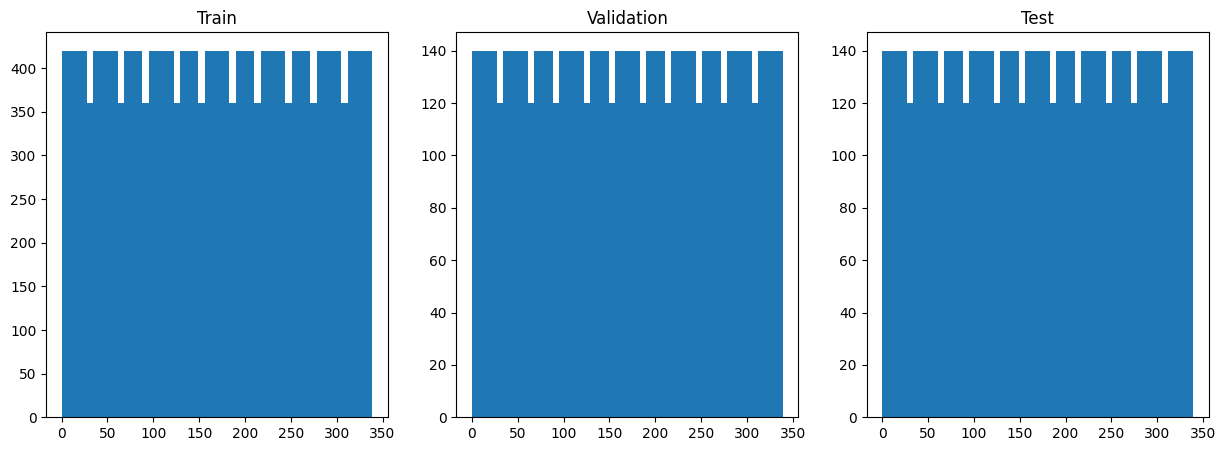

Train:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178

In [6]:
#see if train test validation is balanced
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].hist(train[:,-1], bins=50)
ax[0].set_title('Train')
ax[1].hist(validation[:,-1], bins=50)
ax[1].set_title('Validation')
ax[2].hist(test[:,-1], bins=50)
ax[2].set_title('Test')
plt.show()

#count instances per class
train_count = np.unique(train[:,-1], return_counts=True)
print("Train: ", train_count)
validation_count = np.unique(validation[:,-1], return_counts=True)
print("Validation: ", validation_count)
test_count = np.unique(test[:,-1], return_counts=True)
print("Test: ", test_count)